Step 1: analyse and clean. Requires domain-specific knowledge. 
Step 2: convert (encode) from categorical to numerical values 
Step 3: scale 

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data

df = pd.read_excel("./weather_classif_data.xlsx", engine="openpyxl")
df.columns = df.columns.str.strip()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (Celsius)       13200 non-null  int64  
 1   Humidity (?relative, %)     13200 non-null  int64  
 2   Wind Speed (km/h)           13200 non-null  float64
 3   Precipitation (%)           13200 non-null  int64  
 4   Cloud Cover                 13200 non-null  object 
 5   Atmospheric Pressure (hPa)  13200 non-null  float64
 6   UV Index                    13200 non-null  int64  
 7   Season                      13200 non-null  object 
 8   Visibility (km)             13200 non-null  float64
 9   Location                    13200 non-null  object 
 10  Weather Type                13200 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [3]:
df.columns

Index(['Temperature (Celsius)', 'Humidity (?relative, %)', 'Wind Speed (km/h)',
       'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure (hPa)',
       'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [4]:
df["Weather Type"].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [5]:
df["Location"].value_counts()

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [6]:
df.loc[(df["Precipitation (%)"]>100) & (df["Humidity (?relative, %)"]>100)]

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
37,2,105,19.0,109,overcast,991.68,7,Winter,3.5,mountain,Snowy
292,2,105,10.5,109,overcast,990.79,0,Winter,3.0,mountain,Snowy
395,9,108,27.5,103,partly cloudy,1019.52,10,Spring,3.0,coastal,Cloudy
442,59,106,8.5,109,clear,1023.39,13,Winter,9.0,mountain,Sunny
696,28,104,21.0,109,partly cloudy,1008.63,0,Spring,3.0,coastal,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
12951,36,105,12.5,107,overcast,1019.08,12,Summer,9.0,mountain,Cloudy
13050,-15,105,3.0,103,overcast,993.75,8,Winter,2.5,inland,Snowy
13066,5,102,31.0,108,partly cloudy,1005.89,10,Summer,2.0,inland,Rainy
13113,42,106,32.5,103,partly cloudy,996.45,14,Spring,1.0,mountain,Rainy


In [7]:
df.loc[(df["Precipitation (%)"] > 100) | (df["Humidity (?relative, %)"] > 100)]

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
9,28,74,8.5,107,clear,1012.13,8,Winter,7.5,coastal,Sunny
19,13,102,12.0,72,clear,1012.25,4,Summer,8.0,inland,Sunny
24,38,83,7.0,101,partly cloudy,1017.94,4,Spring,8.5,mountain,Cloudy
37,2,105,19.0,109,overcast,991.68,7,Winter,3.5,mountain,Snowy
56,41,85,9.0,101,overcast,1017.89,3,Summer,7.5,mountain,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...
13090,9,76,1.0,102,overcast,982.64,13,Winter,0.5,inland,Snowy
13113,42,106,32.5,103,partly cloudy,996.45,14,Spring,1.0,mountain,Rainy
13124,46,101,16.0,80,partly cloudy,1015.06,11,Autumn,1.5,inland,Rainy
13136,56,74,0.0,103,partly cloudy,1012.40,10,Summer,5.5,inland,Cloudy


----------------------------------------
Removing precipitation likelihood > 100% -- probability above 1 conceptually impossible -- more than certainty. 
Humidity: keep the values up to 102% -- could sometimes occur in short-term

If data real, not synthetic, then understand why any spurious values exist.


In [8]:
df.loc[(df["Humidity (?relative, %)"] > 100) & (df["Humidity (?relative, %)"] < 103), ["Atmospheric Pressure (hPa)"]].max()

Atmospheric Pressure (hPa)    1027.93
dtype: float64

-----------------------------------------------------------------------------
Cannot be mean *sea level* pressure. Must be pressures at different altitudes. Because the max and min are respectively well above and below the records for mean sea level pressure.

In [9]:
print(df["Atmospheric Pressure (hPa)"].min(), df["Atmospheric Pressure (hPa)"].max())

800.12 1199.21


In [10]:
df["Atmospheric Pressure (hPa)"].describe()

count    13200.000000
mean      1005.827896
std         37.199589
min        800.120000
25%        994.800000
50%       1007.650000
75%       1016.772500
max       1199.210000
Name: Atmospheric Pressure (hPa), dtype: float64

-------------------------------------------------------------------------------------------------
3% of rain likelihood values above 1. Ever that many spurious values in natural datasets?

In [11]:
df.loc[df["Precipitation (%)"] > 100] 

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
9,28,74,8.5,107,clear,1012.13,8,Winter,7.5,coastal,Sunny
24,38,83,7.0,101,partly cloudy,1017.94,4,Spring,8.5,mountain,Cloudy
37,2,105,19.0,109,overcast,991.68,7,Winter,3.5,mountain,Snowy
56,41,85,9.0,101,overcast,1017.89,3,Summer,7.5,mountain,Cloudy
178,41,90,21.5,103,overcast,1002.15,13,Winter,4.0,coastal,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13089,33,99,12.0,105,clear,1028.08,12,Spring,6.0,inland,Sunny
13090,9,76,1.0,102,overcast,982.64,13,Winter,0.5,inland,Snowy
13113,42,106,32.5,103,partly cloudy,996.45,14,Spring,1.0,mountain,Rainy
13136,56,74,0.0,103,partly cloudy,1012.40,10,Summer,5.5,inland,Cloudy


In [12]:
# Removing rows with precipitation likelihood above 1
# Must not use inplace parameter this first time because I used new variable name
precip_spurious = df.loc[df["Precipitation (%)"] > 100]
df_cleaned = df.drop(precip_spurious.index)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
12803,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,mountain,Rainy
12804,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
12805,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
12806,3,76,10.0,94,overcast,984.27,0,Winter,2.0,inland,Snowy


In [13]:
# .min() or .max() method after retrieving specific rows gives interesting and useful result: more concise display 
# of all that datapoint's (feature) values  
df_cleaned.loc[df_cleaned["Humidity (?relative, %)"] > 100].min()

Temperature (Celsius)             -24
Humidity (?relative, %)           101
Wind Speed (km/h)                 0.0
Precipitation (%)                  70
Cloud Cover                     clear
Atmospheric Pressure (hPa)     980.17
UV Index                            0
Season                         Autumn
Visibility (km)                   0.0
Location                      coastal
Weather Type                   Cloudy
dtype: object

In [14]:
df_cleaned.loc[df_cleaned["Humidity (?relative, %)"] > 102].info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 151 to 12597
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (Celsius)       265 non-null    int64  
 1   Humidity (?relative, %)     265 non-null    int64  
 2   Wind Speed (km/h)           265 non-null    float64
 3   Precipitation (%)           265 non-null    int64  
 4   Cloud Cover                 265 non-null    object 
 5   Atmospheric Pressure (hPa)  265 non-null    float64
 6   UV Index                    265 non-null    int64  
 7   Season                      265 non-null    object 
 8   Visibility (km)             265 non-null    float64
 9   Location                    265 non-null    object 
 10  Weather Type                265 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 24.8+ KB


In [15]:
# Removing the rows with relative humidity above 102%
# Here must include inplace parameter both times!
humid_spurious = df_cleaned.loc[df_cleaned["Humidity (?relative, %)"] > 102]
df_cleaned.drop(humid_spurious.index, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
12538,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,mountain,Rainy
12539,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
12540,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
12541,3,76,10.0,94,overcast,984.27,0,Winter,2.0,inland,Snowy


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (Celsius)       12543 non-null  int64  
 1   Humidity (?relative, %)     12543 non-null  int64  
 2   Wind Speed (km/h)           12543 non-null  float64
 3   Precipitation (%)           12543 non-null  int64  
 4   Cloud Cover                 12543 non-null  object 
 5   Atmospheric Pressure (hPa)  12543 non-null  float64
 6   UV Index                    12543 non-null  int64  
 7   Season                      12543 non-null  object 
 8   Visibility (km)             12543 non-null  float64
 9   Location                    12543 non-null  object 
 10  Weather Type                12543 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


<Axes: xlabel='Temperature (Celsius)', ylabel='Count'>

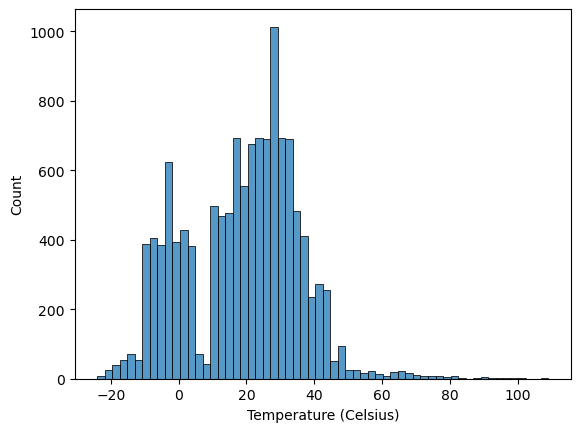

In [17]:
sns.histplot(df_cleaned["Temperature (Celsius)"])

Clean temperature too!

In [18]:
df_cleaned.loc[df_cleaned["Temperature (Celsius)"]>50.5]

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
204,78,81,8.0,78,overcast,1010.19,1,Autumn,4.5,inland,Cloudy
215,63,86,13.0,75,clear,1027.31,14,Summer,2.5,coastal,Sunny
285,60,86,12.0,86,overcast,1003.36,9,Autumn,2.0,inland,Cloudy
301,51,85,13.5,77,clear,1025.39,12,Autumn,5.0,mountain,Sunny
365,70,71,6.5,89,clear,1028.88,6,Autumn,5.0,mountain,Sunny
...,...,...,...,...,...,...,...,...,...,...,...
12266,52,86,40.0,77,partly cloudy,1008.29,2,Spring,5.0,inland,Rainy
12408,52,80,2.0,75,overcast,1005.23,11,Spring,4.0,coastal,Cloudy
12414,97,95,7.5,79,clear,1029.30,9,Winter,4.0,mountain,Sunny
12429,66,81,10.0,97,clear,1015.03,11,Summer,4.5,mountain,Sunny


--------------------------------------------------------------------------
Number of rows before removing spurious temp datapoints: 12543.
Cap temp at 50.5 celsius

In [19]:
# Remove spurious temperature values.
# Could even create a function for removing of rows. Or even a lambda function.
# inplace parameter!
temp_spurious = df_cleaned.loc[df_cleaned["Temperature (Celsius)"] > 50.5]
df_cleaned.drop(temp_spurious.index, inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [20]:
df_cleaned

,Temperature (Celsius),"Humidity (?relative, %)",Wind Speed (km/h),Precipitation (%),Cloud Cover,Atmospheric Pressure (hPa),UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
12313,10,74,14.5,71,overcast,1003.15,1,Summer,1.0,mountain,Rainy
12314,-1,76,3.5,23,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
12315,30,77,5.5,28,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
12316,3,76,10.0,94,overcast,984.27,0,Winter,2.0,inland,Snowy


Creation of new spreadsheet from df_cleaned: df_cleaned.to_excel("cleaned_weather_classif_data.xlsx", index=False)

In [21]:
df_cleaned["Weather Type"].value_counts()

Weather Type
Snowy     3144
Rainy     3083
Cloudy    3074
Sunny     3017
Name: count, dtype: int64

^^ Nice balanced dataset